In [28]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

def arreglarEspacios(valor):
    valor = str(valor)
    if valor[0] == ' ':
        valor = valor[1:]
    if valor == '':
        valor = np.nan
    if valor == 'nan':
        valor = np.nan
    return valor

twits=pd.read_csv("tweet.csv")
usuarios=pd.read_csv("user.csv")
localidades=pd.read_csv("localidades.csv")

twits=twits.applymap(arreglarEspacios)
localidades=localidades.applymap(arreglarEspacios)
usuarios=usuarios.applymap(arreglarEspacios)

/home/chofichofi/anaconda3/envs/participantesTremendas/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Informe de la información sobre los twits recopilados
[Fuente de los archivos .csv] (https://data.world/abbiejp/twitter-data)


## Preguntas

- ### ¿Cuál es el día de la semana con mejor promedio de llegada?

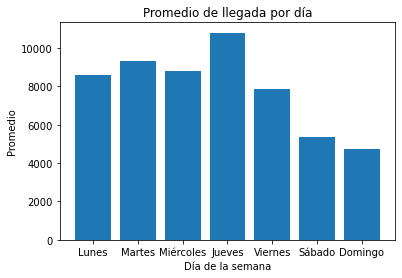

In [29]:
def getPromedioReachPais(localidades):
    twits[" Reach"]=twits[" Reach"].apply(toFloat)
    reachPais=twits[twits[" LocationID"].isin(localidades)][" Reach"].tolist()
    return sum(reachPais)/len(reachPais)

def getPromedio(dia):
    twits[" Reach"]=twits[" Reach"].apply(toFloat)
    reachDia=twits[twits[" Weekday"]==dia][" Reach"].tolist()
    return sum(reachDia)/len(reachDia)

def getPromedioDiaPais(dia,localidades):
    twits[" Reach"]=twits[" Reach"].apply(toFloat)
    reachDia=twits[(twits[" Weekday"]==dia) & (twits[" LocationID"].isin(localidades))][" Reach"].tolist()
    return sum(reachDia)/len(reachDia)

def toFloat(valor):
    return float(valor)

def getMasGrande(num1,num2):
    if num1<num2:
        return num2
    else:
        return num1

def getCantMujeresYHombres(dia):
    usuariosDia=twits[" UserID"][twits[" Weekday"]==dia].tolist()
    generoUsuarios=usuarios["Gender"][usuarios["UserID"].isin(usuariosDia)].tolist()
    cantM=0
    cantH=0
    cantO=0
    for g in generoUsuarios:
        if g == "Male":
            cantH +=1
        elif g == "Female":
            cantM += 1
        else:
            cantO +=1

    cantidades=[cantM,cantH,cantO]
    cantidades.sort(reverse=True)
    return cantidades

dias=["Lunes","Martes","Miércoles","Jueves","Viernes","Sábado","Domingo"]
reachDias=[getPromedio("Monday"),getPromedio("Tuesday"),getPromedio("Wednesday"),getPromedio("Thursday"),getPromedio("Friday"),getPromedio("Saturday"),getPromedio("Sunday")]

plt.bar(dias,reachDias)
plt.title('Promedio de llegada por día')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio')
plt.show()

##### A partir de este gráfico podemos concluir que el día con mejor promedio de llegada es el Jueves, seguido por el Martes y el Miércoles.

- ### Dependiendo del día ¿La mayoría de usuarios que twittearon ese día son hombres o mujeres?

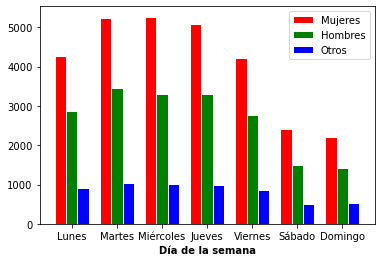

In [30]:
generosDias=[getCantMujeresYHombres("Monday"),getCantMujeresYHombres("Tuesday")]

generoDiasM=[getCantMujeresYHombres("Monday")[0],getCantMujeresYHombres("Tuesday")[0],getCantMujeresYHombres("Wednesday")[0],getCantMujeresYHombres("Thursday")[0],getCantMujeresYHombres("Friday")[0],getCantMujeresYHombres("Saturday")[0],getCantMujeresYHombres("Sunday")[0]]
generoDiasH=[getCantMujeresYHombres("Monday")[1],getCantMujeresYHombres("Tuesday")[1],getCantMujeresYHombres("Wednesday")[1],getCantMujeresYHombres("Thursday")[1],getCantMujeresYHombres("Friday")[1],getCantMujeresYHombres("Saturday")[1],getCantMujeresYHombres("Sunday")[1]]
generoDiasO=[getCantMujeresYHombres("Monday")[2],getCantMujeresYHombres("Tuesday")[2],getCantMujeresYHombres("Wednesday")[2],getCantMujeresYHombres("Thursday")[2],getCantMujeresYHombres("Friday")[2],getCantMujeresYHombres("Saturday")[2],getCantMujeresYHombres("Sunday")[2]]

barWidth=0.25

r1=np.arange(len(generoDiasM))
r2=[x + barWidth for x in r1]
r3=[x + barWidth for x in r2]

plt.bar(r1,generoDiasM,color='r',width=barWidth,edgecolor='white',label='Mujeres')
plt.bar(r2,generoDiasH,color='g',width=barWidth,edgecolor='white',label='Hombres')
plt.bar(r3,generoDiasO,color='b',width=barWidth,edgecolor='white',label='Otros')

plt.xlabel('Día de la semana',fontweight='bold')
plt.xticks([r+barWidth for r in range(len(generoDiasM))],dias)

plt.legend()
plt.show()


##### Se puede apreciar que en todos los días de la semana twittean más mujeres que hombres.

- ### ¿Cuál es el procentaje de twits provenientes de la Argentina? ¿Cuánto difiere en comparación a los dós paises con más cantidad de twits?

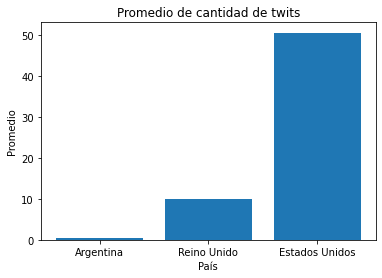

In [31]:
localidadesArgentina=localidades["LocationID"][localidades["Country"]=="Argentina"].tolist()
localidadesEu=localidades["LocationID"][localidades["Country"]=="United States"].tolist()
localidadesUk=localidades["LocationID"][localidades["Country"]=="United Kingdom"].tolist()

twitsArgentina=twits[twits[" LocationID"].isin(localidadesArgentina)]
twitsEu=twits[twits[" LocationID"].isin(localidadesEu)]
twitsUk=twits[twits[" LocationID"].isin(localidadesUk)]

porcentajes=[len(twitsArgentina)*100/len(twits),len(twitsUk)*100/len(twits),len(twitsEu)*100/len(twits)]

x=["Argentina","Reino Unido","Estados Unidos"]

plt.bar(x,porcentajes)
plt.title('Promedio de cantidad de twits')
plt.xlabel('País')
plt.ylabel('Promedio')
plt.show()

- ### ¿Cuál es el promedio de reach de los twits de Argentina? ¿Cuánto difieren de los de los dos países con más twits?

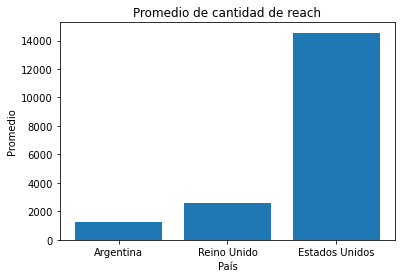

In [32]:
reachPaises=[getPromedioReachPais(localidadesArgentina),getPromedioReachPais(localidadesUk),getPromedioReachPais(localidadesEu)]

plt.bar(x,reachPaises)
plt.title('Promedio de cantidad de reach')
plt.xlabel('País')
plt.ylabel('Promedio')
plt.show()

- ### ¿Cómo varía la llegada de los twits provenientes de la Argentina durante la semana?

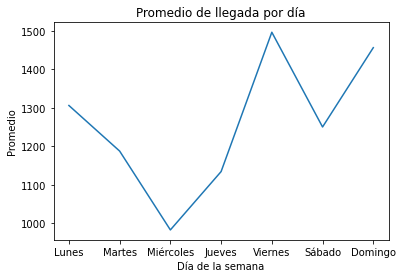

In [33]:
reachDias=[getPromedioDiaPais("Monday",localidadesArgentina),getPromedioDiaPais("Tuesday",localidadesArgentina),getPromedioDiaPais("Wednesday",localidadesArgentina),getPromedioDiaPais("Thursday",localidadesArgentina),getPromedioDiaPais("Friday",localidadesArgentina),getPromedioDiaPais("Saturday",localidadesArgentina),getPromedioDiaPais("Sunday",localidadesArgentina)]

plt.plot(dias,reachDias)
plt.title('Promedio de llegada por día')
plt.xlabel('Día de la semana')
plt.ylabel('Promedio')
plt.show()

##### En este gráfico podemos ver que en la primera mitad de la semana la llegada de los twits va en descenso y llegando al fin de semana este sube y llega a su punto máximo el viernes.